#THE SIMPSONS: episode data
Nicole Burns

In [1]:
#import libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import plotly.plotly as py

%matplotlib inline

#### Data Structure Creation

In [2]:
#read in dataset
episodes = pd.read_csv(\
    'https://query.data.world/s/iyELjYZMD3v2ckBg0gSF0OSNq11gc_')
                                        #stored as a pandas dataframe

In [3]:
#if feature is irrelevant & redundant & not of any use: drop 
episodes = episodes.drop(['image_url','production_code','video_url',\
                          'original_air_year','id'], axis=1)

#if feature irrelevant & redundant, yet useful: pop 
titles = episodes.pop('title') #stored as pandas Series

#### Missing Values Handling

In [4]:
isnull = episodes.isnull().sum()

In [5]:
#create a nan_values dataframe to id missing values
nan_values = episodes[['imdb_rating','imdb_votes',\
                        'us_viewers_in_millions', 'views']]

nan_values[nan_values.isnull().any(axis=1)] #view missing values

,imdb_rating,imdb_votes,us_viewers_in_millions,views
59,7.8,1005.0,NaN,60912.0
65,7.7,913.0,NaN,54155.0
189,6.7,543.0,7.03,NaN
234,NaN,NaN,NaN,NaN
235,NaN,NaN,NaN,NaN
236,NaN,NaN,NaN,NaN
320,8.8,1268.0,NaN,66281.0


In [6]:
#fill missing continuous features' values with the mode
episodes['us_viewers_in_millions'].values[59] =\
        episodes['us_viewers_in_millions'].mode()[0]
episodes['us_viewers_in_millions'].values[65] =\
        episodes['us_viewers_in_millions'].mode()[0]
episodes['us_viewers_in_millions'].values[320] =\
         episodes['us_viewers_in_millions'].mode()[0]  

episodes['views'].values[189] =\
        episodes['views'].mode()[0]

#drop rows missing very many values
episodes.drop(episodes.index[234:237], inplace=True)

#check for any remaining null (NaN) values
episodes[episodes.isnull().any(axis=1)] #should be empty

,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,season,us_viewers_in_millions,views


####Misc. Munging

In [7]:
#Dates

#convert the date into Pandas to_datetime format for easy handling
episodes['original_air_date'] = \
     pd.to_datetime(episodes.original_air_date)
    
#if breaking up date into meaningful parts is helpful: do!
air_weekday = episodes.original_air_date.dt.weekday
air_year = episodes.original_air_date.dt.year
air_month = episodes.original_air_date.dt.month
air_day = episodes.original_air_date.dt.day

#create columns from the parts of the date
episodes['day_of_mnth'] = air_day
episodes['month'] = air_month
episodes['year'] = air_year
episodes['weekday'] = air_weekday

##if feature irrelevant & redundant, yet useful: pop 
original_air_date = episodes.pop('original_air_date')

In [8]:
#list data types of features to ensure 
#no unwanted types remain
episodes.dtypes 

imdb_rating               float64
imdb_votes                float64
number_in_season            int64
number_in_series            int64
season                      int64
us_viewers_in_millions    float64
views                     float64
day_of_mnth                 int64
month                       int64
year                        int64
weekday                     int64
dtype: object

## Data Structures

In [9]:
episodes.T #primary data structure, cleaned/organized

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
imdb_rating,7.4,8.3,8.2,8.1,8.0,8.4,7.8,8.0,8.2,7.6,...,5.90,7.00,6.30,6.80,7.00,7.00,7.30,6.90,6.40,7.00
imdb_votes,1511.0,1716.0,1638.0,1457.0,1366.0,1522.0,1340.0,1329.0,1413.0,1243.0,...,706.00,603.00,619.00,571.00,492.00,580.00,541.00,460.00,473.00,504.00
number_in_season,10.0,12.0,1.0,4.0,6.0,8.0,10.0,13.0,15.0,17.0,...,9.00,11.00,14.00,15.00,22.00,14.00,16.00,3.00,12.00,18.00
number_in_series,10.0,12.0,14.0,17.0,19.0,21.0,23.0,26.0,28.0,30.0,...,429.00,431.00,434.00,435.00,486.00,500.00,502.00,511.00,542.00,548.00
season,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,20.00,20.00,20.00,20.00,22.00,23.00,23.00,24.00,25.00,25.00
us_viewers_in_millions,30.3,30.4,33.6,26.1,25.4,26.2,24.8,26.2,26.8,21.2,...,5.75,6.52,6.15,6.58,5.25,5.77,4.97,5.65,2.69,3.64
views,50816.0,62561.0,59575.0,64959.0,50691.0,57605.0,56486.0,58277.0,47426.0,44331.0,...,38582.00,41271.00,45727.00,43254.00,43681.00,45226.00,44818.00,39687.00,39292.00,55742.00
day_of_mnth,25.0,29.0,11.0,1.0,15.0,6.0,10.0,7.0,21.0,28.0,...,25.00,1.00,22.00,29.00,22.00,19.00,11.00,4.00,9.00,13.00
month,3.0,4.0,10.0,11.0,11.0,12.0,1.0,2.0,2.0,3.0,...,1.00,3.00,3.00,3.00,5.00,2.00,3.00,11.00,3.00,4.00
year,1990.0,1990.0,1990.0,1990.0,1990.0,1990.0,1991.0,1991.0,1991.0,1991.0,...,2009.00,2009.00,2009.00,2009.00,2011.00,2012.00,2012.00,2012.00,2014.00,2014.00


In [10]:
#create a dataframe from the two "popped" features 
#(supplementary data structure)
episodes_quick = pd.concat([titles, original_air_date], axis=1)
episodes_quick = episodes_quick.T #foreign key = row number
episodes_quick.T.head()

,title,original_air_date
0,Homer's Night Out,1990-03-25 00:00:00
1,Krusty Gets Busted,1990-04-29 00:00:00
2,"Bart Gets an ""F""",1990-10-11 00:00:00
3,Two Cars in Every Garage and Three Eyes on Eve...,1990-11-01 00:00:00
4,Dead Putting Society,1990-11-15 00:00:00


##Descriptive Statistics

In [11]:
ep_dstats = episodes.describe().T
ep_dstats

,count,mean,std,min,25%,50%,75%,max
imdb_rating,597.0,7.386097,0.732439,4.50,6.9,7.30,8.0,9.2
imdb_votes,597.0,832.365159,396.117937,104.00,560.0,697.00,1095.0,3734.0
number_in_season,597.0,11.628141,6.537636,1.00,6.0,12.00,17.0,25.0
number_in_series,597.0,299.000000,172.483333,1.00,150.0,299.00,448.0,597.0
season,597.0,14.030151,7.711825,1.00,7.0,14.00,21.0,28.0
us_viewers_in_millions,597.0,11.855645,6.400613,2.32,7.1,10.31,15.1,33.6
views,597.0,48677.988275,17847.546007,144.00,41271.0,45931.00,57590.0,171408.0
day_of_mnth,597.0,14.966499,8.346254,1.00,8.0,15.00,21.0,31.0
month,597.0,6.023451,3.927974,1.00,3.0,5.00,10.0,12.0
year,597.0,2002.646566,7.731269,1989.00,1996.0,2003.00,2009.0,2016.0


In [12]:
#used to find feature ranges 
#(supplementary data structure)
ep_range = ep_dstats[['min','max']].T

### SEASON & DATE INFORMATION

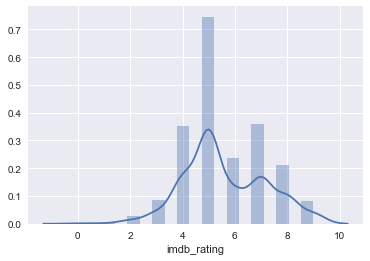

In [13]:
#summary of discretized imdb_ratings
groups = np.arange(10)
imdb_rating_rnd = \
    pd.cut(episodes['imdb_rating'], 10, labels=groups)
sns.distplot(imdb_rating_rnd)

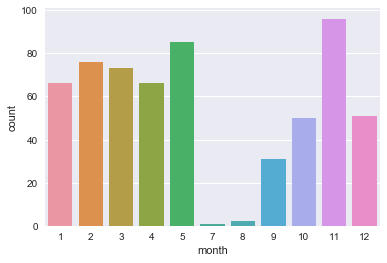

In [14]:
#episodes per month
sns.countplot(episodes.month)

In [15]:
print("{0: Mon, 1: Tues, 2: Weds, 3: Thurs, 4: Fri, 5: Sat, 6: Sun}")
episodes.weekday.value_counts().to_frame()

{0: Mon, 1: Tues, 2: Weds, 3: Thurs, 4: Fri, 5: Sat, 6: Sun}


,weekday
6,503
3,89
2,2
1,2
4,1


In [16]:
#range of season data
ep_range_0 = ep_dstats[['min','max']].T
ep_range = ep_range_0[['number_in_season','season']]
ep_range.T

,min,max
number_in_season,1.0,25.0
season,1.0,28.0


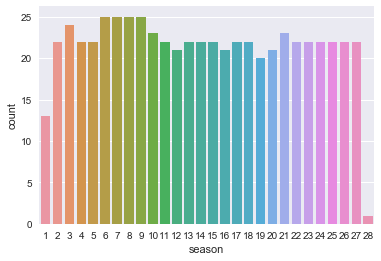

In [17]:
sns.countplot(episodes.season)

In [18]:
print("average number of episodes per season:",\
episodes.number_in_season.value_counts().mean())

average number of episodes per season: 23.88


In [19]:
date_range = ep_range_0[['year','month','day_of_mnth']]
date_range.T

,min,max
year,1989.0,2016.0
month,1.0,12.0
day_of_mnth,1.0,31.0


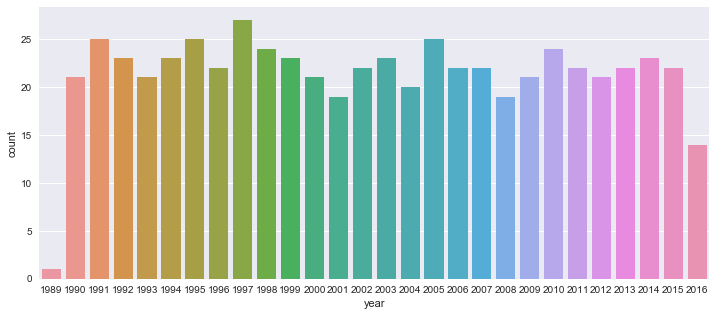

In [20]:
plt.figure(figsize=(12,5))
sns.countplot(episodes.year)
plt.show()

### RATING INFORMATION

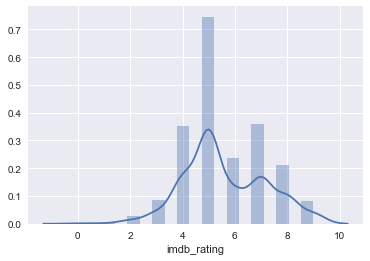

In [21]:
#summary of discretized imdb_ratings
groups = np.arange(10)
imdb_rating_rnd = \
    pd.cut(episodes['imdb_rating'], 10, labels=groups)
sns.distplot(imdb_rating_rnd)

In [22]:
# count of discretized imdb_ratings
imdb_rating_rnd.value_counts()

5    211
7    102
4    100
6     67
8     60
3     24
9     23
2      8
1      1
0      1
Name: imdb_rating, dtype: int64

In [23]:
#rating ranges
ep_range_0['imdb_rating'].to_frame()

,imdb_rating
min,4.5
max,9.2


#### Higest Rating

In [24]:
imdb_rating = list(episodes.imdb_rating)
imdb_rating = sorted(imdb_rating)
episodes[episodes.imdb_rating == imdb_rating[-1]]

,imdb_rating,imdb_votes,number_in_season,number_in_series,season,us_viewers_in_millions,views,day_of_mnth,month,year,weekday
535,9.2,2439.0,2,155,8,13.9,79609.0,3,11,1996,6
537,9.2,2256.0,23,176,8,11.8,74177.0,4,5,1997,6


In [25]:
print(episodes_quick[[535, 537]].T)

                   title    original_air_date
535  You Only Move Twice  1996-11-03 00:00:00
537        Homer's Enemy  1997-05-04 00:00:00


#### Lowest Rating

In [26]:
imdb_rating = list(episodes.imdb_rating)
imdb_rating = sorted(imdb_rating)
episodes[episodes.imdb_rating == imdb_rating[0]]

,imdb_rating,imdb_votes,number_in_season,number_in_series,season,us_viewers_in_millions,views,day_of_mnth,month,year,weekday
193,4.5,1215.0,22,508,23,4.82,44434.0,20,5,2012,6


In [27]:
print(episodes_quick[[193]])

                                   193
title                   Lisa Goes Gaga
original_air_date  2012-05-20 00:00:00


In [28]:
episodes.head()

,imdb_rating,imdb_votes,number_in_season,number_in_series,season,us_viewers_in_millions,views,day_of_mnth,month,year,weekday
0,7.4,1511.0,10,10,1,30.3,50816.0,25,3,1990,6
1,8.3,1716.0,12,12,1,30.4,62561.0,29,4,1990,6
2,8.2,1638.0,1,14,2,33.6,59575.0,11,10,1990,3
3,8.1,1457.0,4,17,2,26.1,64959.0,1,11,1990,3
4,8.0,1366.0,6,19,2,25.4,50691.0,15,11,1990,3


In [29]:
episodes.groupby(['season', 'number_in_series'])\
['imdb_rating'].mean().to_frame().T

season             1                                               ...    27  \
number_in_series  1    2    3    4    5    6    7    8    9    10  ...   588   
imdb_rating       8.2  7.8  7.5  7.8  8.1  7.6  7.9  7.7  7.5  7.4 ...   6.6   

season                                                     28  
number_in_series  589  590  591  592  593  594  595  596  597  
imdb_rating       6.3  7.3  6.5  6.4  7.1  6.7  6.4  6.9  6.6  

[1 rows x 597 columns]

In [30]:
episodes.T

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
imdb_rating,7.4,8.3,8.2,8.1,8.0,8.4,7.8,8.0,8.2,7.6,...,5.90,7.00,6.30,6.80,7.00,7.00,7.30,6.90,6.40,7.00
imdb_votes,1511.0,1716.0,1638.0,1457.0,1366.0,1522.0,1340.0,1329.0,1413.0,1243.0,...,706.00,603.00,619.00,571.00,492.00,580.00,541.00,460.00,473.00,504.00
number_in_season,10.0,12.0,1.0,4.0,6.0,8.0,10.0,13.0,15.0,17.0,...,9.00,11.00,14.00,15.00,22.00,14.00,16.00,3.00,12.00,18.00
number_in_series,10.0,12.0,14.0,17.0,19.0,21.0,23.0,26.0,28.0,30.0,...,429.00,431.00,434.00,435.00,486.00,500.00,502.00,511.00,542.00,548.00
season,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,20.00,20.00,20.00,20.00,22.00,23.00,23.00,24.00,25.00,25.00
us_viewers_in_millions,30.3,30.4,33.6,26.1,25.4,26.2,24.8,26.2,26.8,21.2,...,5.75,6.52,6.15,6.58,5.25,5.77,4.97,5.65,2.69,3.64
views,50816.0,62561.0,59575.0,64959.0,50691.0,57605.0,56486.0,58277.0,47426.0,44331.0,...,38582.00,41271.00,45727.00,43254.00,43681.00,45226.00,44818.00,39687.00,39292.00,55742.00
day_of_mnth,25.0,29.0,11.0,1.0,15.0,6.0,10.0,7.0,21.0,28.0,...,25.00,1.00,22.00,29.00,22.00,19.00,11.00,4.00,9.00,13.00
month,3.0,4.0,10.0,11.0,11.0,12.0,1.0,2.0,2.0,3.0,...,1.00,3.00,3.00,3.00,5.00,2.00,3.00,11.00,3.00,4.00
year,1990.0,1990.0,1990.0,1990.0,1990.0,1990.0,1991.0,1991.0,1991.0,1991.0,...,2009.00,2009.00,2009.00,2009.00,2011.00,2012.00,2012.00,2012.00,2014.00,2014.00


## Correlations

In [31]:
episodes_corr = episodes.corr()
episodes_corr

,imdb_rating,imdb_votes,number_in_season,number_in_series,season,us_viewers_in_millions,views,day_of_mnth,month,year,weekday
imdb_rating,1.000000,0.783829,-0.000065,-0.747142,-0.742424,0.622749,0.575786,0.000884,0.091267,-0.747041,-0.460974
imdb_votes,0.783829,1.000000,-0.103570,-0.849787,-0.841633,0.786736,0.667108,0.054525,0.074565,-0.846692,-0.515565
number_in_season,-0.000065,-0.103570,1.000000,0.011935,-0.025169,-0.154831,-0.010995,0.027323,-0.593580,0.025479,0.005787
number_in_series,-0.747142,-0.849787,0.011935,1.000000,0.999071,-0.855683,-0.592674,-0.034245,-0.019448,0.999128,0.573096
season,-0.742424,-0.841633,-0.025169,0.999071,1.000000,-0.846334,-0.590445,-0.035645,0.004629,0.998017,0.561975
us_viewers_in_millions,0.622749,0.786736,-0.154831,-0.855683,-0.846334,1.000000,0.551936,-0.000251,0.039365,-0.850026,-0.638301
views,0.575786,0.667108,-0.010995,-0.592674,-0.590445,0.551936,1.000000,0.044392,0.025734,-0.590803,-0.319915
day_of_mnth,0.000884,0.054525,0.027323,-0.034245,-0.035645,-0.000251,0.044392,1.000000,-0.045781,-0.035963,0.016387
month,0.091267,0.074565,-0.593580,-0.019448,0.004629,0.039365,0.025734,-0.045781,1.000000,-0.054811,-0.075547
year,-0.747041,-0.846692,0.025479,0.999128,0.998017,-0.850026,-0.590803,-0.035963,-0.054811,1.000000,0.565771


In [32]:
grps = ['NegStrong', 'NegMedium', 'Weak', 'PosMedium', \
        'PosStrong']

cols = ['imdb_rating','imdb_votes','number_in_season', \
        'number_in_series','season', \
        'us_viewers_in_millions', 'views','year',\
        'month', 'day_of_mnth']

for col in cols:
     episodes_corr[col] = pd.cut(episodes_corr[col], \
            (-1, -0.8, -0.6, 0.6, 0.8, 1), labels=grps)
episodes_corr['imdb_rating']

imdb_rating               PosStrong
imdb_votes                PosMedium
number_in_season               Weak
number_in_series          NegMedium
season                    NegMedium
us_viewers_in_millions    PosMedium
views                          Weak
day_of_mnth                    Weak
month                          Weak
year                      NegMedium
weekday                        Weak
Name: imdb_rating, dtype: category
Categories (5, object): [NegMedium < NegStrong < PosMedium < PosStrong < Weak]

### Conclusions- No strong correlations exist between imdb_rating and these non-content related features
- Some medium correlations exist:
    - As the number of votes and us_viewers_in_millions increased, imdb_rating increased slightly.
        - <i>this suggests that the more people that watch, the higher the rating</i>
    - As year, season, and number_in_series increased, imdb_rating decreased slightly.
        - <i>this suggests that either the quality is slightly declining, or the viewers expect better once exposed over time</i>